# 1. Who collected the data? (2 points)

Our Airbnb listing data and geographical boundary data are from Inside Airbnb, which is a non-commercial database constructed by Murray Cox. And our long-term housing rental data is from London Datastore updated by Valuation Office Agency (VOA).

## 2. Why did they collect it? (4 points) 

Inside Airbnb collects data to understand the impact of Airbnb short-term rentals on local neighborhoods and real estate markets. It aims to inform research, policy decisions, and public understanding of the sharing economy. And the VOA collected the long-term housing rental data to produce reports and statistics, including the Index of Private Housing Rental Prices (IPHRP) through providing data to government and other stakeholders, and support economic research and analysis. 

## 3. How was the data collected? (5 points)

Inside Airbnb collected data on London's Airbnb listings by scraping the Airbnb website once a month. This means that they used software to automatically gather information from the website, such as the number of listings, the type of properties, and the prices. This data was then cleaned and analyzed to produce insights into the Airbnb market in London. While the Valuation Office Agency collects long-term housing rental data from a variety of sources, through rent data directly from landlords and letting agents, sample of rental properties, property transactions and the National Landlord Register. 

## 4. How does the method of collection impact the completeness and/or accuracy of its representation of the process it seeks to study, and what wider issues does this raise? (11 points)

While both the Valuation Office Agency (VOA)'s data and Inside Airbnb's dataset have been widely used by researchers, their data collection method can be subjected to limitations:

Airbnb's scraping method may only capture a partial portion of rental properties. This can result in an incomplete representation of the overall rental market. Additionally, the data collection process may experience delays in gathering and processing the data, affecting its accuracy for near-term analysis. Furthermore, outliers in the data may skew the average rental prices, making the data less reliable.

VOA's data collection method may have availability lags, as data is typically released quarterly or annually, delaying its availability for analysis. Moreover, some landlords or letting agents may not report accurately, introducing gaps or inaccuracies in the data. Another limitation is geographic variability, where data representativeness varies across regions and property types. Finally, integrating data from multiple sources can introduce inconsistencies, further reducing the reliability of the data.

## 5. What ethical considerations does the use of this data raise? (18 points)
Privacy and Informed Consent: The data collected by Inside Airbnb and VOA includes sensitive information about individuals, such as their names, addresses, and property details. This information could be used to identify and target individuals, or to discriminate against them. The ethical principle of informed consent should be applied for how users’ data are collected, processed, and shared.

Community Impact and Gentrification: Scholarly analysis should extend to the broader societal impact of short-term and long-term housing on local communities. Ethical considerations include investigating whether the platform contributes to gentrification, alters the local housing landscape, and affects the socioeconomic fabric of neighborhoods.

Regulatory Compliance and Legal Ethicality: Examining Airbnb and housings’ adherence to data protection laws and regulations offers an academic lens to evaluate the company's legal ethicality. Scholars may explore instances of compliance or non-compliance, contributing to a nuanced understanding of the platform's ethical standing within legal frameworks.

Cultural Sensitivity and Global Impact: The global reach of both short-term and long-term housing necessitates an examination of cultural sensitivity. Ethical considerations should encompass the platform's responsiveness to diverse cultural norms, laws, and societal expectations across different regions.

Algorithmic Transparency and Bias: Airbnb's use of algorithms for personalized recommendations, pricing, and other features introduces ethical considerations related to transparency and potential biases. Researchers should explore the opacity of these algorithms and investigate whether they inadvertently perpetuate discrimination or exacerbate existing societal biases.

Data Security and Cybersecurity: The handling of extensive personal and financial data by Airbnb necessitates a robust examination of data security and cybersecurity measures. Ethical considerations involve assessing the adequacy of these measures to protect against potential data breaches and unauthorized access. A hacker could exploit information such as respondents’ IP address and visited sites for nefarious purposes [16] [17].

User Trust and Accountability: Trust is foundational to the success of platforms like Airbnb. Researchers should explore how the company establishes and maintains user trust through ethical practices. Additionally, academic scrutiny can focus on mechanisms of accountability in cases of disputes, ensuring fairness and justice in conflict resolution.

In [4]:
# import packages
import os
import pandas as pd
import numpy as np
import seaborn as sn
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [5]:
host = 'https://orca.casa.ucl.ac.uk'
path = '~jreades/data'
file = '2023-09-06-listings.csv.gz'
url  = f'{host}/{path}/{file}'

if os.path.exists(file):
  df = pd.read_csv(file, compression='gzip', low_memory=False)
else: 
  df = pd.read_csv(url, compression='gzip', low_memory=False)
  df.to_csv(file)

In [8]:
#load the rental market dataset
housing_data = pd.read_csv('Data/housing_data.csv',skiprows=2)

In [ ]:
#load the datasets
airbnb_data = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz', low_memory= False )
#load the rental market dataset
housing_data = pd.read_csv('https://github.com/XuZiHan-010/FSDS_Groupwork/raw/main/housing_data.csv',skiprows=2)
#load the geo-spatial data
london_geodata=gpd.read_file('http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/neighbourhoods.geojson')

In [13]:
# Data wrangled and filtered due to specific reasons, discussed in Question 7.
# Filter out the columns
columns_to_keep = ['host_total_listings_count','host_is_superhost','description', 'host_since', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'bathrooms_text', 'bedrooms', 'beds', 'number_of_reviews', 'price', 'availability_365']
airbnb_data = airbnb_data[columns_to_keep]

# Filter the data to include only listings that are available
airbnb_data = airbnb_data[airbnb_data['availability_365'] > 0]

#select the numerical columns
numerical_columns = ['host_total_listings_count','price', 'host_since', 'bedrooms', 'beds','latitude','longitude']

# Calculate descriptive statistics for categorical columns
categorical_columns = ['description','property_type', 'host_identity_verified','neighbourhood_cleansed','number_of_reviews','bathrooms_text']

# as we have price saved as a format like $130,000.00 so we need to deal with the '$' and ',' to convert it to numeric
airbnb_data['price'] = airbnb_data['price'].str.replace('$','', regex=False).str.replace(',','').astype('float')
#convert host_since to the date format 
airbnb_data['host_since'] = pd.to_datetime(airbnb_data['host_since'])

#define the property types which we won't use 
exclude_types = ['Boat', 'Camper/RV', 'Houseboat', 'Religious building', 'Room in aparthotel']
#select the property type
airbnb_data = airbnb_data[~airbnb_data['property_type'].isin(exclude_types)]

# Define the start and end date for the period
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2018-12-31')

# Filter the DataFrame for rows where the host_since falls within the specified range(2016-2018)
airbnb_data = airbnb_data[(airbnb_data['host_since'] >= start_date) & (airbnb_data['host_since'] <= end_date)]

#only need the airbnb_data which host_listings is less than two
airbnb_data = airbnb_data[airbnb_data['host_total_listings_count']<2]


#check whether the columns in numerical_columns is numerical or not
for column in numerical_columns:
    if column in airbnb_data.columns:
        print(f"Data type of '{column}': {airbnb_data[column].dtype}")
        if pd.api.types.is_numeric_dtype(airbnb_data[column]):
            print(f"{column} is numeric.")
        else:
            print(f"{column} is not numeric.")
    else:
        print(f"{column} is not in the DataFrame.")

AttributeError: Can only use .str accessor with string values!

In [ ]:
#view the shape of data frame
print(airbnb_data.shape)

In [ ]:
#check na for london geo-spatial data
na_count = london_geodata.isna().sum()
print(na_count)

In [26]:
#drop the empty column
london_geodata = london_geodata.dropna(axis=1)

In [37]:
"""
===
Analysis on Airbnb dataset:
===
"""

'\n===\nAnalysis on Airbnb dataset:\n===\n'

## 6. With reference to the data (*i.e.* using numbers, figures, maps, and descriptive statistics), what does an analysis of Hosts and Listing types suggest about the nature of Airbnb lets in London? (15 points)

By wrangling and filtering out the Airbnb listings that are out of our research scope, we have found that there are 3756 observations in this dataset. We have conducted descriptive statistics analyses based on our Airbnb dataset using bar chart, boxplot, scatterplot, and heatmaps. Our main findings are as below:

Price: The average nightly price of £161.58 masks a vast range, with listings spanning from £8 to £20,362. This variance reflects the diverse offerings within Airbnb, catering to varied budgets and styles according to renters’ diverse preferences in London. The standard deviation of £421.86 further highlights the significant spread, hinting at the potential influence of factors of location, amenities, and seasonality.

Property Preference: There are 46 unique types of property listed according to our dataset, which provides short-term renters a comprehensive choice of listings. With 1,143 entire rental units, a clear preference for renting out full apartments or houses dominates the market. This choice may align with travellers’ desire for autonomy and privacy during their stay, while one the other hand, it may resonate with hosts seeking greater potential income compared to shared spaces.

Boroughs: The spatial distribution of Airbnb listings reveals a distinct concentration in Lambeth, which boasts the highest number (275) across the three years. This contrasts sharply with the City of London's mere 6 listings. This disparity likely stems from a combination of factors. Lambeth's larger landmass provides more housing options suitable for short-term rentals, while its vicinity to popular tourist destinations like Westminster Abbey and Buckingham Palace further fuels demand.

Number of Bedrooms: Our result indicates that among all types of Airbnb listings from 2016 to 2018, the majority of Airbnb rooms only have 1 bedroom. Rooms with 6 bedrooms would cost the highest (700 pounds per day on average), while rooms with 1 bedroom only would cost the lowest (nearly 100 pounds per day on average). It also suggests that Airbnbs with 4 bedrooms has the highest variation in price, ranged from 300 to 1000 pounds per day. 

From individual hosts sharing their homes to professional management companies catering to larger groups, the platform caters to a wide range of budgets and preferences. The price variations tied to bedrooms further highlight the variety of experiences available, from budget-friendly solo adventures to luxurious group getaway Our data paints a picture of a vibrant and multifaceted Airbnb landscape in London.

In [27]:
# Descriptive statistics for the dataset
# write the descriptive statistics into a txt file which seems to be easy for analysis
for column in numerical_columns:
    print(f"Descriptive statistics for {column}:")
    print(str(airbnb_data[column].describe()))
     
for column in categorical_columns:
    print(f"Unique values for {column}:\n")
    print(str(airbnb_data[column].value_counts()))

Descriptive statistics for host_total_listings_count:
count    3756.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: host_total_listings_count, dtype: float64
Descriptive statistics for price:
count     3756.000000
mean       161.581470
std        421.864163
min          8.000000
25%         70.000000
50%        115.000000
75%        180.000000
max      20362.000000
Name: price, dtype: float64
Descriptive statistics for host_since:
count                             3756
mean     2017-03-23 09:43:07.859425024
min                2016-01-01 00:00:00
25%                2016-06-10 00:00:00
50%                2017-01-25 00:00:00
75%                2017-12-24 06:00:00
max                2018-12-30 00:00:00
Name: host_since, dtype: object
Descriptive statistics for bedrooms:
count    2322.000000
mean        1.701120
std         0.935806
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max 

<Figure size 1200x1000 with 0 Axes>

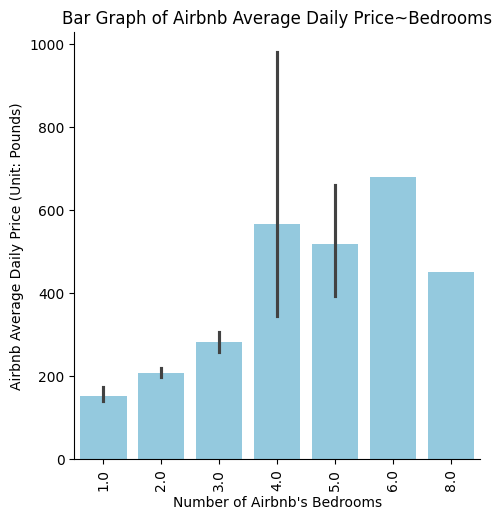

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.catplot(x='bedrooms', y='price', data=airbnb_data, kind='bar', color='skyblue')
plt.xticks(rotation=90)
# The black vertical line on some bars represents the variability and uncertainty in the data
# The longer the line, the more dispersed the data is
plt.xlabel("Number of Airbnb's Bedrooms")
plt.ylabel('Airbnb Average Daily Price (Unit: Pounds)')
plt.title('Bar Graph of Airbnb Average Daily Price~Bedrooms')
plt.savefig('BarGraph_Airbnb_Price~Bedrooms.png')
plt.show()

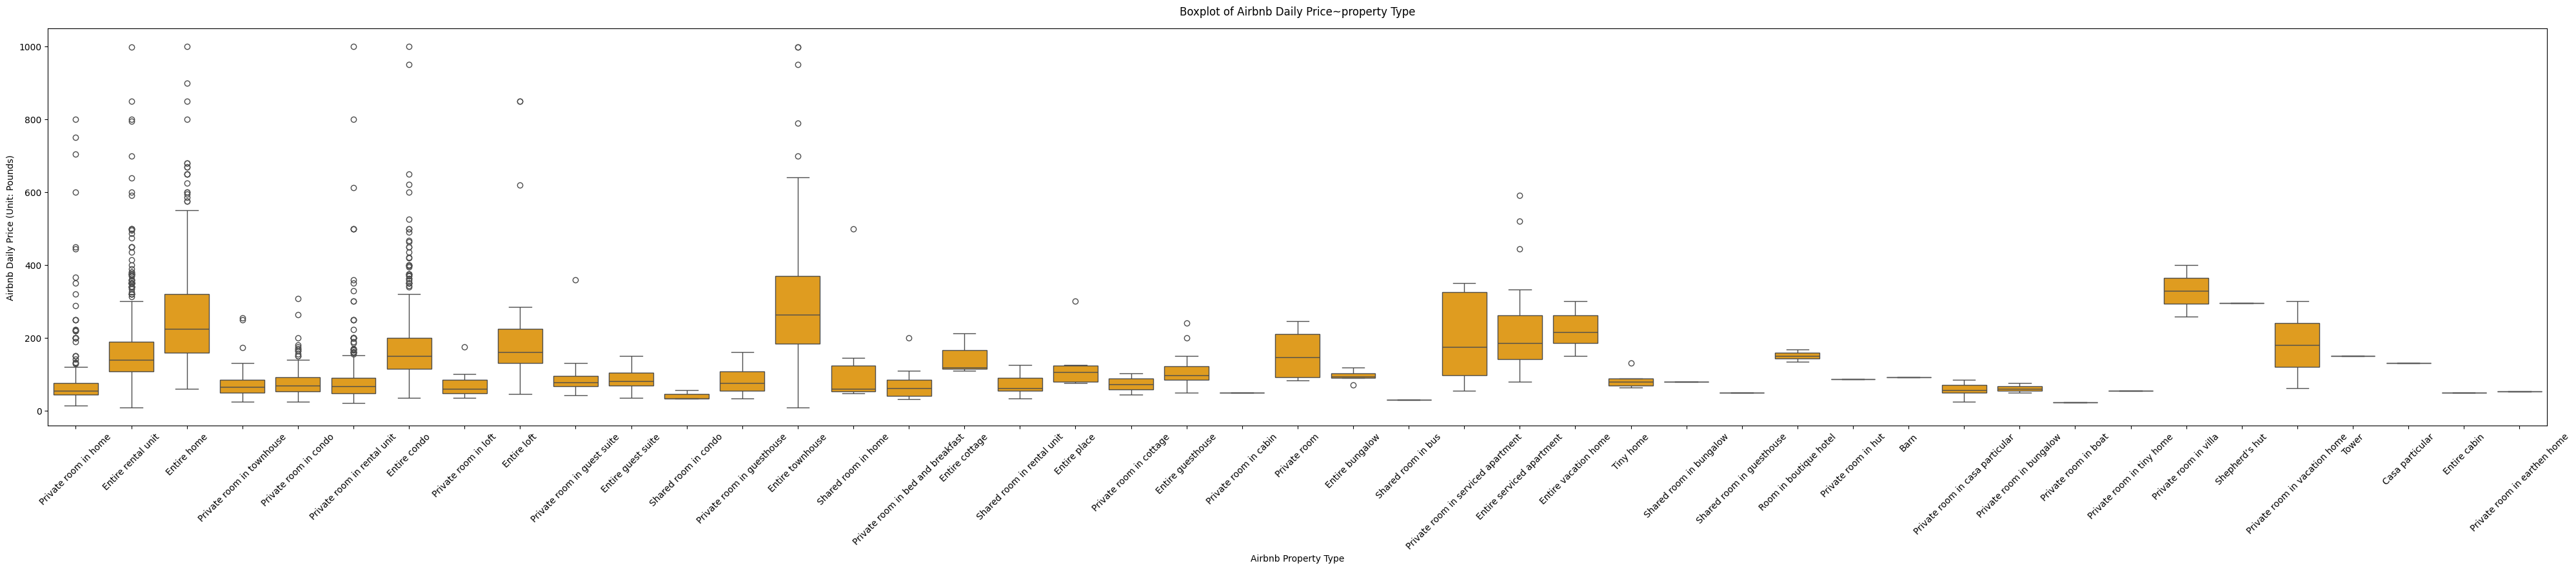

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 8))
sns.boxplot(x='property_type',
            y='price',
            data=airbnb_data[airbnb_data.price <= 1000],
            color='orange'
            )
plt.ylabel('Airbnb Daily Price (Unit: Pounds)')
plt.xlabel('Airbnb Property Type')
plt.title("Boxplot of Airbnb Daily Price~property Type", y=1.02)
plt.xticks(rotation=45)
plt.savefig('Boxplot_Price~PropertyType.png', bbox_inches='tight')
plt.show() # Double click the graph to zoom in if it is too small

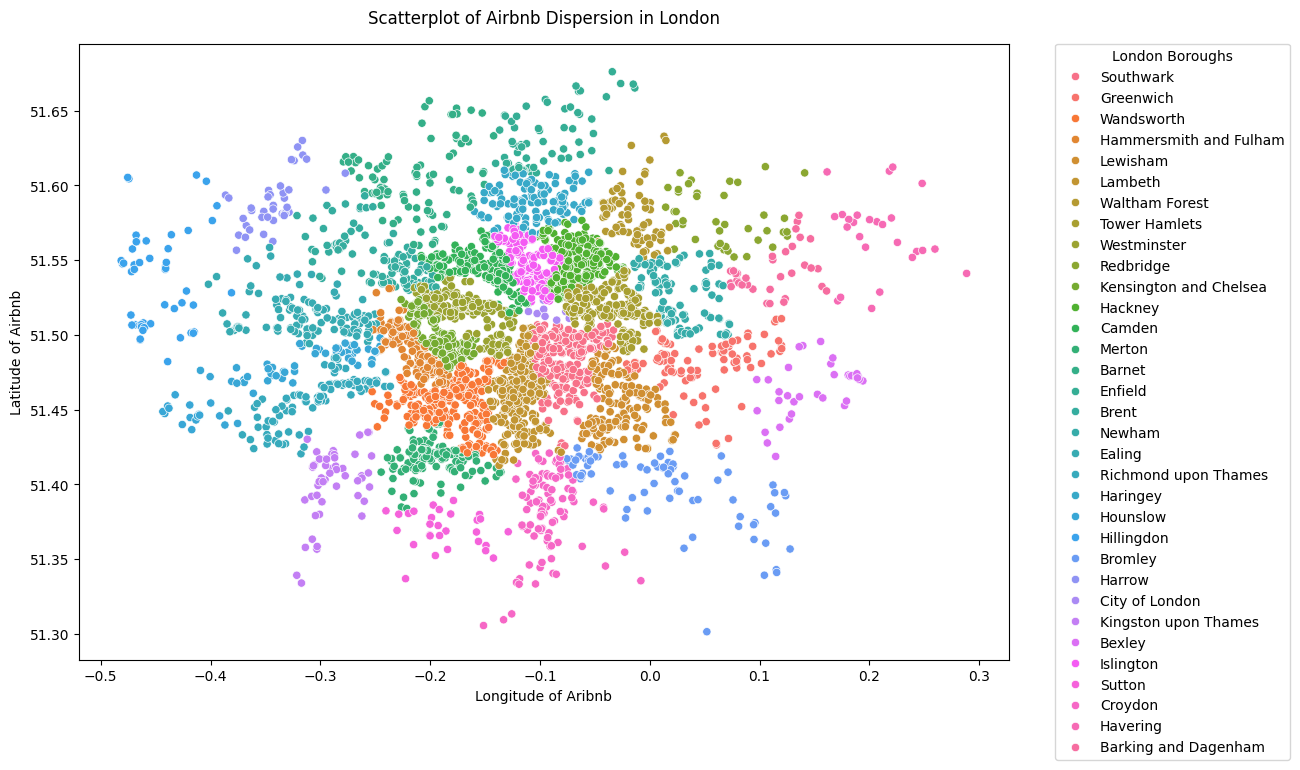

In [29]:
plt.figure(figsize=(12,8))
sn.scatterplot(data=airbnb_data, x='longitude', y='latitude', hue='neighbourhood_cleansed')
plt.ylabel('Latitude of Airbnb')
plt.xlabel('Longitude of Aribnb')
plt.title('Scatterplot of Airbnb Dispersion in London', y=1.02)
# Place the legend outside the plot
legend = plt.legend(title='London Boroughs', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('Scatterplot_Airbnb_Dispersion.png', bbox_inches='tight') 
plt.show()

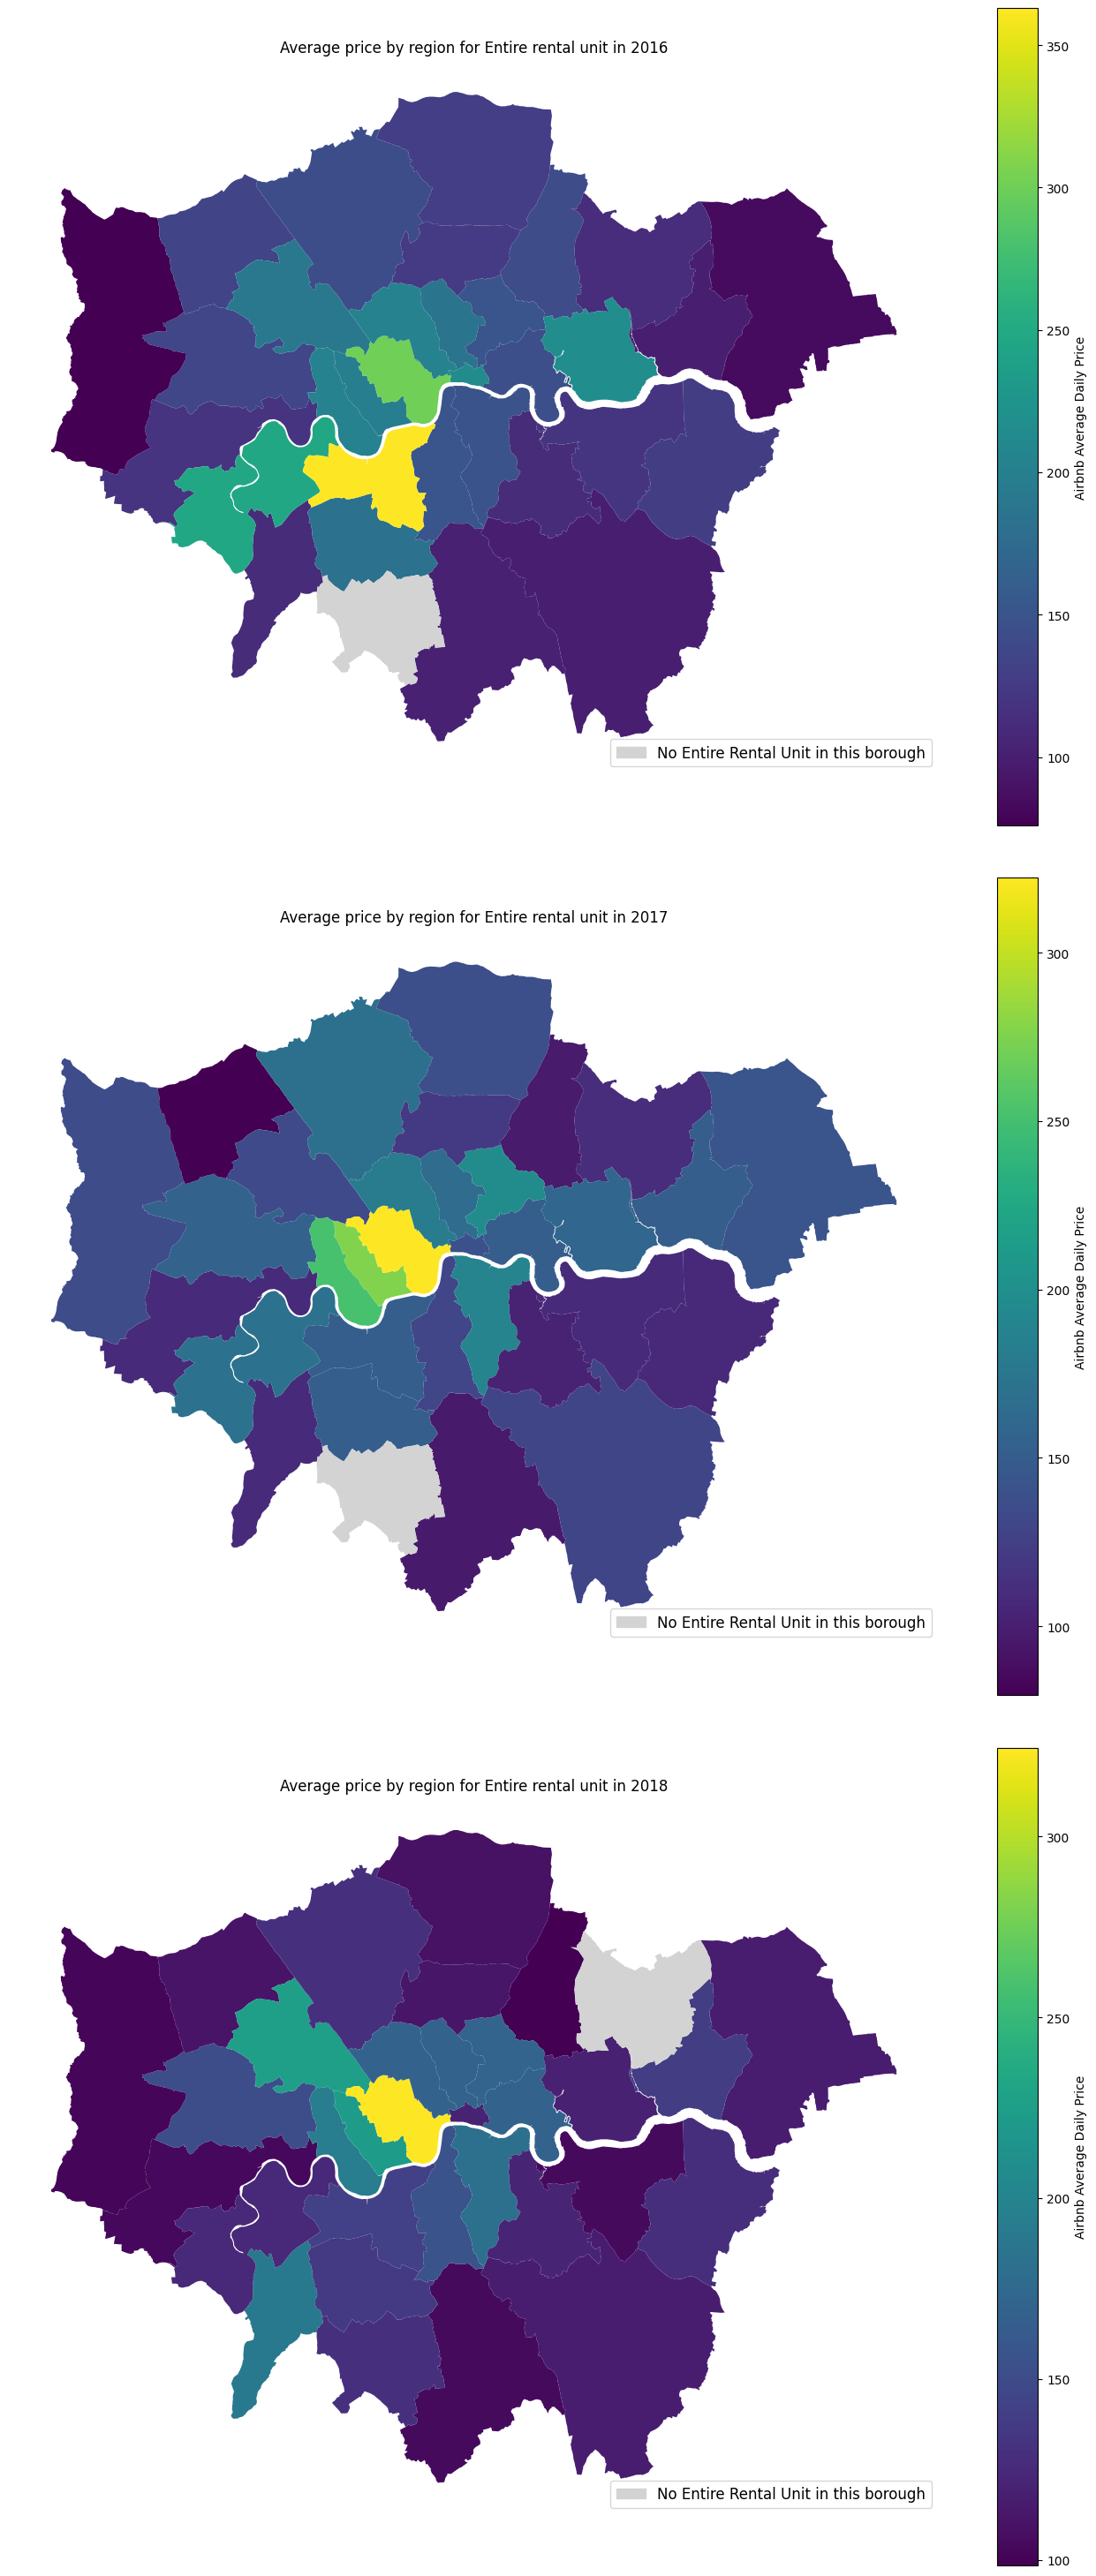

In [31]:
# Extract the year from 'host_since' and create a new 'year' column format like 2011 from 2011-01-01
airbnb_data['year'] = airbnb_data['host_since'].dt.year

# select entire rental unit only as we'll focus on it 
df_properties = airbnb_data[airbnb_data['property_type'] == 'Entire rental unit']

# Group and calculate average price by region and year
grouped_data = df_properties.groupby(['neighbourhood_cleansed', 'year'])['price'].mean().reset_index()

# Pivot the data to have years as columns and regions as rows
pivoted_data = grouped_data.pivot(index='neighbourhood_cleansed', columns='year', values='price')

# Merge the GeoDataFrame with the pivoted data only once
gdf = london_geodata.merge(pivoted_data, how='left', left_on='neighbourhood', right_index=True)

# Specify the year spell as we are focus on 2016-2018
years = [2016, 2017, 2018]
legend_handle = [Patch(facecolor='lightgrey', edgecolor='lightgrey', label='No Entire Rental Unit in this borough')]
# Set up the figure for subplots
fig, axs = plt.subplots(len(years), 1, figsize=(14, 10 * len(years)))  

for i, year in enumerate(years):
    # Plot the choropleth map for each year
    ax = axs[i]
    gdf.plot(column=year, ax=ax, legend=True,
             legend_kwds={'label': "Airbnb Average Daily Price", 'orientation': "vertical"},
             cmap='viridis',  # Choose a colormap that matches your data
             missing_kwds={'color': 'lightgrey'})  # Color for missing values
    ax.set_title(f'Average price by region for Entire rental unit in {year}')
    ax.axis('off')  # Remove axis for clarity
    axs[i].legend(handles=legend_handle, loc='lower right', fontsize='large')

plt.tight_layout(pad=3.0)
plt.show()

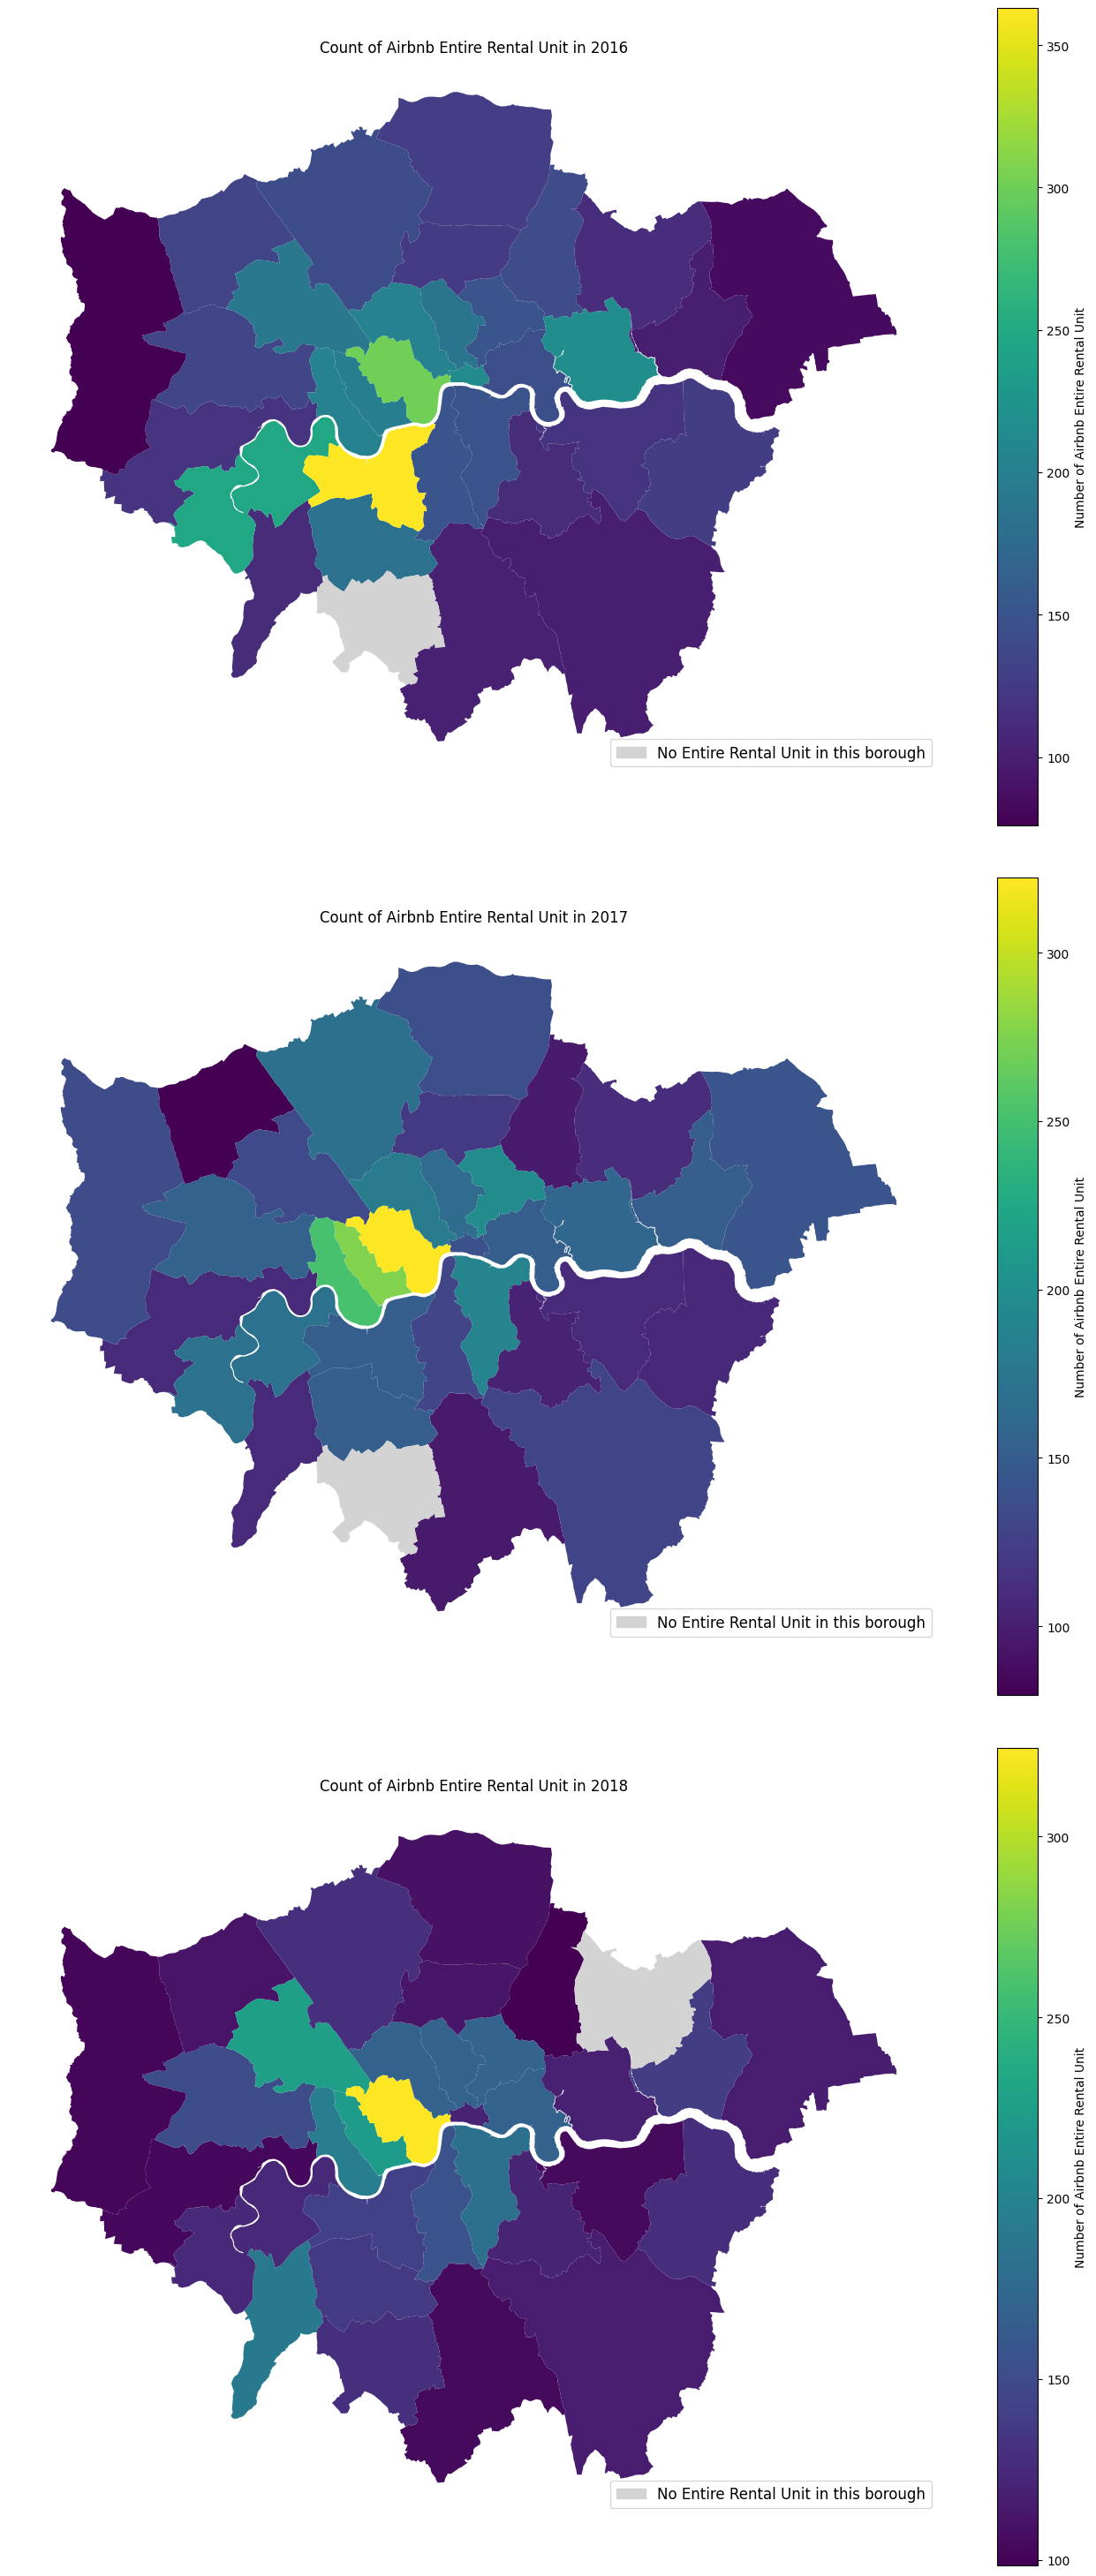

In [32]:
grouped_data = airbnb_data.groupby(['neighbourhood_cleansed', 'year']).size().reset_index(name='count')
# Pivot the data to have years as columns and regions as rows
pivoted_data = grouped_data.pivot(index='neighbourhood_cleansed', columns='year', values='count')

fig, axs = plt.subplots(len(years), 1, figsize=(14, 10 * len(years))) 
legend_handle = [Patch(facecolor='lightgrey', edgecolor='lightgrey', label='No Entire Rental Unit in this borough')]
for i, year in enumerate(years):
    # Plot the choropleth map for each year
    ax = axs[i]
    gdf.plot(column=year, ax=ax, legend=True,
             legend_kwds={'label': "Number of Airbnb Entire Rental Unit", 'orientation': "vertical"},
             cmap='viridis',  
             missing_kwds={'color': 'lightgrey'})  
    ax.set_title(f'Count of Airbnb Entire Rental Unit in {year}')
    ax.axis('off') 
    # add the legend for demonstrating the gray patch representing no value in that area
    axs[i].legend(handles=legend_handle, loc='lower right', fontsize='large')

plt.tight_layout(pad=3.0)
# plt.savefig('airbnb_listings_count_map.png', dpi=600) 
plt.show()

In [ ]:
"""
===
Long-term listing data descriptive statistics:
===
"""

In [36]:
#actually we don't have na in our housing dataset but we have symbol . instead which fill in the empty cell
#set a boolean mask to remove these dots
mask_dot = (housing_data == '.').any(axis=1)
mask_comma = (housing_data == ',').any(axis=1)
mask_double_dot = (housing_data == '..').any(axis=1)

# Combine the masks
combined_mask = mask_dot | mask_comma | mask_double_dot

# Filter the DataFrame
housing_data = housing_data[~combined_mask]
# Filter out the columns
condition = (
    (housing_data['Year'] >= 2016) &
    (housing_data['Year'] <= 2018))

housing_data = housing_data[condition]

#Descriptive statistics for 'Count of rents
print("Descriptive statistics for 'Count of rents':")
print(str(housing_data['Count of rents'].describe()))

#Descriptive statistics for 'Average
print("Descriptive statistics for 'Average':")
print(str(housing_data['Average'].describe()))
    
# Value counts for 'Area'
print("Value counts for 'Area':")
print(str(housing_data['Area'].value_counts()))
   

# Value counts for 'Category'
print("Value counts for 'Category':")
print(str(housing_data['Category'].value_counts()))

Descriptive statistics for 'Count of rents':
count     1826
unique     571
top         20
freq        46
Name: Count of rents, dtype: object
Descriptive statistics for 'Average':
count     1826
unique    1262
top        624
freq         6
Name: Average, dtype: object
Value counts for 'Area':
Area
Barking and Dagenham        42
NORTH WEST                  42
Newham                      42
Redbridge                   42
Southwark                   42
Tower Hamlets               42
Waltham Forest              42
Wandsworth                  42
Westminster                 42
NORTH EAST                  42
YORKSHIRE AND THE HUMBER    42
Lewisham                    42
EAST MIDLANDS               42
WEST MIDLANDS               42
EAST                        42
LONDON                      42
SOUTH EAST                  42
SOUTH WEST                  42
Inner London                42
Outer London                42
Barnet                      42
Merton                      42
Lambeth             

## 7. Drawing on your previous answers, and supporting your response with evidence (e.g. figures, maps, and statistical analysis/models), how *could* this data set be used to inform the regulation of Short-Term Lets (STL) in London? (45 points)

The dataset we have used encompassing London's Airbnb listings and long-term rental data, would enable us to investigate the relationships between single-listing Airbnb hosts and long-term rentals. Now, we can leverage it to tackle the crucial question: Could a heavier sales tax on single-listing Airbnb hosts influence the long-term housing market?

### Quantifying the Localized Impact:
To address this, we can delve deeper into our data, employing tools such as scatter plots and heatmaps to visualize the relationships between single-listing STLs and long-term housing availability and prices. This granular analysis, focusing on specific neighborhoods and boroughs, will reveal which areas are most affected and which housing types face the brunt of the impact. For example, comparing Lambeth's concentration of STLs with its long-term rental scarcity could expose a crucial correlation.

### Predicting Policy Scenarios:
But simply observing these interactions isn't enough. We can utilize statistical models, specifically a difference-in-differences (DID) approach, to simulate the potential outcomes of different policy scenarios. Imagine testing the proposed sales tax, comparing housing market changes before and after its implementation in specific areas. This allows us to assess the predicted impact on both long-term housing availability and prices, providing policymakers with valuable insights before enacting real-world changes.

### Addressing Nuances and Limitations:
However, we shall acknowledge data limitations and the contextual differences between London and Taiwan. Biases within the data and contextual differences necessitate caution in extrapolating our findings. While Chen et al.'s study in Taiwan offers valuable context, London's unique dynamics require careful consideration. In this study, we have specifically taken into consideration of the following influential factors:
1.	Temporal scope: We restricted our analysis to the period January 2016 to December 2018, as this timeframe encompasses the most recent available data for both short-term and long-term rental listings in London.
2.	Listing Availability: We limited our analysis to active, available Airbnb listings, ensuring that the data reflects the current state of the short-term rental market.
3.	Host Ownership: We confined our examination to Airbnb hosts who exclusively own one single short-term Airbnb listing in London. Since London’s current sales tax policy only applies to hosts who own two or more short-term Airbnb listings, we shall focus on hosts with one single listing specifically. 
4.	Housing Type: Other housing types aside from entire house/apt, e.g. hotel rooms or private rooms, cannot be transitioned into long-term listings, consequently having no impact on the quantity and pricing of long-term listings.

However, other variables we may not be able to control in this research using the datasets above, such as amenities, spatial variations and external socio-economic factors between London and Taiwan. Further research may be necessary for providing a more comprehensive insights for policy suggestions. 

With such exploration and uses of the dataset, we may test the effectiveness of whether implementing heavier sales tax on single-listing Airbnb hosts would produce positive effects to London's long-term housing market.

In [ ]:
## References